# Hello World

In this notebook, I take my first steps in setting up the environment for this project.

## Imports

In [1]:
import sklearn
import numpy as np
import pandas as pd
import os
import sys


from os.path import dirname
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
note_dir = os.getcwd()
root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, 'src')
bonsai_dir = os.path.join(src_dir, 'bonsaidt')

sys.path.extend([src_dir, bonsai_dir])

One thing to note is that bonsai should be compiled and installed manually too. (Apart from what happens here.)

In [3]:
# Custom Packages
import bonsai
import mercs

from bonsai.base import *
from bonsai.utils.visuals import (plot_corr,
                                  plot_summary_grid)

## Dataset

In [4]:
iris = load_iris()
X, y = iris['data'], iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
train = pd.DataFrame(X_train)
train = train.assign(y=y_train)
train = train.assign(y2=y_train)
train.head()

,0,1,2,3,y,y2
0,4.8,3.0,1.4,0.3,0,0
1,4.6,3.6,1.0,0.2,0,0
2,5.2,3.4,1.4,0.2,0,0
3,6.9,3.2,5.7,2.3,2,2
4,7.7,2.6,6.9,2.3,2,2


In [6]:
test = pd.DataFrame(X_test)
test = test.assign(y=y_test)
test = test.assign(y2=y_test)
#train.head()

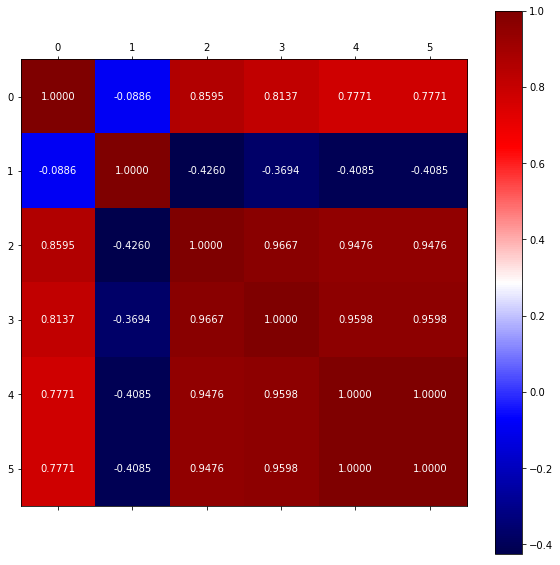

In [7]:
corr = train.corr().values
plot_corr(corr)

In [8]:
#plot_summary_grid(train, samples=10)

## Learn MERCS

In [9]:
from mercs.core import MERCS

In [10]:
model = MERCS()

In [11]:
ind_parameters = {'ind_type':           'DT',
                  'ind_max_depth':       4}

sel_parameters = {'sel_type':           'Base',
                  'sel_its':            10,
                  'sel_param':          1}

model.fit(train, **ind_parameters, **sel_parameters)

Let's inspect our model

In [12]:
model.m_list[0].get_params()

{}

In [13]:
model.m_list[0]

PalmboomClassifier()

Looks good to me! (lgtm). Let us define a query

Now we use MERCS to predict this query

In [14]:
# make a query
n, m = train.values.shape
q_code = np.zeros(m)
q_code[-1:] = 1

#q_code[0] = -1
#q_code[1] = -1
q_code[2] = -1
#q_code[3] = -1
print(q_code)

test_copy = test.copy()
test_copy.iloc[:, q_code==1] = np.nan # I just cannot believe the results are so good. So I make sure MERCS CANNOT KNOW ABOUT THE TRUTH

#pred_parameters = {'predict_type':'MA', 'predict_its': 0.1, 'predict_param': 0.99}
pred_parameters = {'predict_type':'MAFI', 'predict_its': 0.1, 'predict_param': 0.99}
#pred_parameters = {'predict_type':'RW', 'predict_its': 64, 'predict_param': 10}

y_pred = model.predict(test_copy,
                       **pred_parameters,
                       qry_code=q_code)

y_true = test[test.columns.values[np.array(q_code)==1]].values

obs = f1_score(y_true, y_pred, average='macro')
obs


[ 0.  0. -1.  0.  0.  1.]


1.0

In [15]:
test_copy.head()

,0,1,2,3,y,y2
0,7.7,2.8,6.7,2.0,2,NaN
1,6.7,3.3,5.7,2.5,2,NaN
2,7.2,3.0,5.8,1.6,2,NaN
3,4.4,3.2,1.3,0.2,0,NaN
4,4.7,3.2,1.3,0.2,0,NaN


In [16]:
df2

NameError: name 'df2' is not defined

And lets see how we perform;